0.02 1.16


0.03 1.74
0.03 12.44
0.03 13.32


0.04 2.32
0.04 10.56
0.04 15.74


0.05 2.9
0.05 9.77
0.05 17.09


0.06 3.48
0.06 9.21
0.06 18.21


0.07 4.05
0.07 8.76
0.07 19.2


0.08 4.63
0.08 8.39
0.08 20.13


0.09 5.21
0.09 8.07
0.09 21.0


0.1 5.79
0.1 7.79
0.1 21.84


0.11 6.37
0.11 7.54
0.11 22.64


0.12 6.95
0.12 7.32
0.12 23.42


0.13 24.18


0.14 24.93


0.15 25.66


0.16 26.38


0.17 27.09


0.18 27.79


0.19 28.48


0.2 29.16


0.21 29.84






























































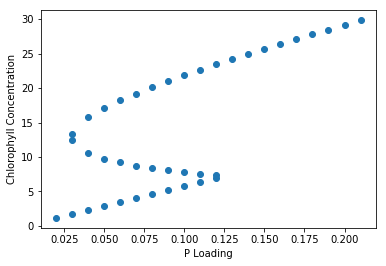

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

with open('bif_output.txt', 'w') as bifout:
    
    b = 0.9
    g = 0.03
    s = 0.085
    ze = 13.7520
    h = 0.0006
    e = 0.65
    p = (1.0 / b)*(g + s / ze + h)
    DO = 11.1
    zh = 4.915
    kt = 1.6245
    alpha = 0.12
    dpdt = 0.0
    
    for l in np.arange(0.02,0.51,0.01):
        for x in np.arange(0.0,30.01,0.01):

            dpdtdummy = dpdt
            R = (14.0/150)*(150-(DO*(50+zh))/(3.8*(1.15*(x**(1.33))/(9+1.15*(x**(1.33))))*kt+alpha))

            if R <= 0:
                R = 0

            r = R/ze
            dpdt = l + r + e * g * x - b * x * p - h * p

            if dpdtdummy < 0:
                if dpdt > 0:
                    print(l,x)
                    bifout.write("%.2f %.2f\n" % (l,x))

            if dpdtdummy > 0:
                if dpdt < 0:
                    print(l,x)
                    bifout.write("%.2f %.2f\n" % (l,x))

        print("\n")
        bifout.write("\n")

        dpdtdummy = 0
        dpdt = 0
                    

bifout.close()
                    
X, Y = [], []
with open('bif_output.txt') as val:
    lines = (line.rstrip() for line in val)
    lines = list(line for line in lines if line) # Non-blank lines in a list
    X = [line.split()[0] for line in lines]
    Y = [line.split()[1] for line in lines]

    plt.plot(X,Y,"o")
    plt.xlabel('P Loading')
    plt.ylabel('Chlorophyll Concentration')
    plt.show()
    savefig('bif.png', bbox_inches='tight') # Remove white space around the image
    
                    